In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib tk

In [2]:
result = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash")

In [3]:
result.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.812189,6.840533
std,0.799375,4.512137
min,2.686210,-1.447010
25%,6.215210,3.296137
50%,6.834345,6.286845
75%,7.403785,9.900232
max,10.223900,24.636100


In [4]:
result_change3 = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange3")

In [5]:
result_change3.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.773096,6.837442
std,0.801981,4.485217
min,3.110970,-1.473140
25%,6.196218,3.318353
50%,6.784180,6.290355
75%,7.376510,9.983478
max,10.364400,22.495300


In [6]:
result_change1 = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange1")

In [7]:
result_change1.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.894103,6.804003
std,0.821478,4.599082
min,3.666260,-1.402120
25%,6.281583,3.158913
50%,6.918155,6.202150
75%,7.500350,9.911380
max,11.487500,27.826600


In [8]:
result_change10 = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange10")

In [9]:
result_change10.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.751269,6.784468
std,0.799553,4.395134
min,3.112540,-1.503540
25%,6.165415,3.326835
50%,6.765220,6.204805
75%,7.352615,9.784408
max,10.336300,24.181900


In [10]:
result_change1_1mm = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange1_1mm")

In [11]:
result_change1_1mm.describe()

,finalCash_realVol,finalCash_pricingVol
count,1000000.000000,1000000.000000
mean,6.882526,6.886676
std,0.813270,4.600392
min,2.465740,-1.610920
25%,6.272090,3.240818
50%,6.896380,6.329300
75%,7.485950,10.033200
max,13.005200,30.379700


In [15]:
daily_hedge = pd.read_csv("/home/lin/git/2018_term_experiment/daylyPositionHedged_dailyChange1", header=None)

In [16]:
daily_hedge.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,-0.015749,-0.006806,-0.023062,-0.012631,-0.017733,-0.026240,0.018648,-0.053272,0.013734,-0.139077,...,2.842170e-14,0.000000e+00,0.000000e+00,-2.842170e-14,-2.842170e-14,2.842170e-14,2.842170e-14,-2.842170e-14,-2.842170e-14,NaN
1,-0.019559,-0.010347,-0.015075,-0.018340,-0.009037,-0.043192,-0.015559,-0.062017,-0.001222,0.171598,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,-0.011027,0.022050,-0.013084,-0.009474,-0.023059,-0.008001,-0.021667,-0.022919,0.077595,-0.014600,...,8.475440e-18,-2.963270e-24,4.704420e-23,-1.805780e-32,1.475980e-31,-3.903940e-46,1.652840e-44,-1.152680e-96,1.663500e-95,NaN
3,0.033895,0.058702,0.054279,0.312520,0.040862,0.099711,-0.017803,0.049915,-0.023203,0.001204,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4,0.009043,0.062858,-0.000249,0.087348,-0.007817,0.014168,-0.023162,-0.012546,-0.017789,0.031707,...,-1.402360e-01,-1.075100e-01,2.377620e-02,-9.934300e-02,2.681030e-02,-8.318950e-02,2.525370e-02,-2.850010e-02,5.396810e-03,NaN


In [17]:
abs(daily_hedge).head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,0.015749,0.006806,0.023062,0.012631,0.017733,0.026240,0.018648,0.053272,0.013734,0.139077,...,2.842170e-14,0.000000e+00,0.000000e+00,2.842170e-14,2.842170e-14,2.842170e-14,2.842170e-14,2.842170e-14,2.842170e-14,NaN
1,0.019559,0.010347,0.015075,0.018340,0.009037,0.043192,0.015559,0.062017,0.001222,0.171598,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,0.011027,0.022050,0.013084,0.009474,0.023059,0.008001,0.021667,0.022919,0.077595,0.014600,...,8.475440e-18,2.963270e-24,4.704420e-23,1.805780e-32,1.475980e-31,3.903940e-46,1.652840e-44,1.152680e-96,1.663500e-95,NaN
3,0.033895,0.058702,0.054279,0.312520,0.040862,0.099711,0.017803,0.049915,0.023203,0.001204,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4,0.009043,0.062858,0.000249,0.087348,0.007817,0.014168,0.023162,0.012546,0.017789,0.031707,...,1.402360e-01,1.075100e-01,2.377620e-02,9.934300e-02,2.681030e-02,8.318950e-02,2.525370e-02,2.850010e-02,5.396810e-03,NaN


In [20]:
avg_hedging = abs(daily_hedge).mean()

In [25]:
pd.set_option('display.max_rows', None)  

avg_hedging

0      0.022086
1      0.034770
2      0.022560
3      0.050271
4      0.022641
5      0.063407
6      0.022293
7      0.071825
8      0.022404
9      0.076256
10     0.022357
11     0.083883
12     0.022548
13     0.090596
14     0.022504
15     0.093676
16     0.022169
17     0.100263
18     0.022804
19     0.104511
20     0.022839
21     0.107459
22     0.022253
23     0.108704
24     0.022213
25     0.111605
26     0.022362
27     0.113405
28     0.022589
29     0.116235
30     0.022088
31     0.115793
32     0.022626
33     0.119535
34     0.022303
35     0.120113
36     0.022677
37     0.121769
38     0.022835
39     0.123924
40     0.022591
41     0.125349
42     0.023270
43     0.128764
44     0.022608
45     0.127056
46     0.022510
47     0.126045
48     0.022559
49     0.125705
50     0.022941
51     0.129626
52     0.022998
53     0.127930
54     0.022782
55     0.129079
56     0.022970
57     0.129843
58     0.022806
59     0.128291
60     0.022769
61     0.128568
62     0

In [33]:
pricingVolHedge = list()
realVolHedge = list()
for i in range(504):
    if i % 2 == 1:
        pricingVolHedge.append(avg_hedging[i])
    else:
        realVolHedge.append(avg_hedging[i], realVolHedge)
        

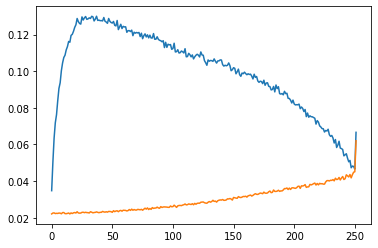

In [37]:
plt.plot(pricingVolHedge)
plt.plot(realVolHedge, realVolHedge)